In [78]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer,StandardScaler
from sklearn.linear_model import LogisticRegression

#### Data Directory Path

In [79]:
data_dir='6a62a5b4967411ea/Dataset/'

#### Load Training and Test Data

In [80]:
train_data=pd.read_csv(os.path.join(data_dir,'Train.csv'))
test_data=pd.read_csv(os.path.join(data_dir,'Test.csv'))

#### Print first 5 rows of training data

In [81]:
train_data.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


#### Print Shape of Training and Test Data

In [82]:
print(train_data.shape)
test_data.shape

(23856, 18)


(15903, 17)

#### Test Data have one less column than train data,which is obvious as test data does not have the target column.

#### Check if there are any null values in the dataset

In [83]:
train_data.isna().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [84]:
test_data.isna().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

#### See the description of Training Data

In [85]:
train_data.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


#### Fetch day, month and year from the date column

In [86]:
def fetch_day(sample):
    return sample[:2]
def fetch_month(sample):
    return sample[3:6]
def fetch_year(sample):
    return sample[7:]

In [87]:
train_data['day']=train_data['DATE'].apply(fetch_day)
test_data['day']=test_data['DATE'].apply(fetch_day)

train_data['month']=train_data['DATE'].apply(fetch_month)
test_data['month']=test_data['DATE'].apply(fetch_month)

train_data['year']=train_data['DATE'].apply(fetch_year)
test_data['year']=test_data['DATE'].apply(fetch_year)

In [88]:
train_data.drop(['DATE'],axis=1,inplace=True)
test_data.drop(['DATE'],axis=1,inplace=True)

In [89]:
train_data.head()

,INCIDENT_ID,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,day,month,year
0,CR_102659,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,04,JUL,04
1,CR_189752,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,18,JUL,17
2,CR_184637,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,15,MAR,17
3,CR_139071,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,13,FEB,09
4,CR_109335,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,13,APR,05


#### change month into numeric form

In [90]:
train_data['month']=pd.to_datetime(train_data['month'], format='%b').dt.month
test_data['month']=pd.to_datetime(test_data['month'], format='%b').dt.month

In [91]:
train_data.head()

,INCIDENT_ID,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,day,month,year
0,CR_102659,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,04,7,04
1,CR_189752,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,18,7,17
2,CR_184637,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,15,3,17
3,CR_139071,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,13,2,09
4,CR_109335,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,13,4,05


#### Plot Histogram for all numerical columns of training data

In [92]:
num_data=train_data.select_dtypes(include=['int','float'])

In [93]:
num_data=num_data.drop('MULTIPLE_OFFENSE',axis=1)

/usr/local/lib64/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib64/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib64/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib64/python3.7/site-packages/pandas/plotting/_matplotlib/to

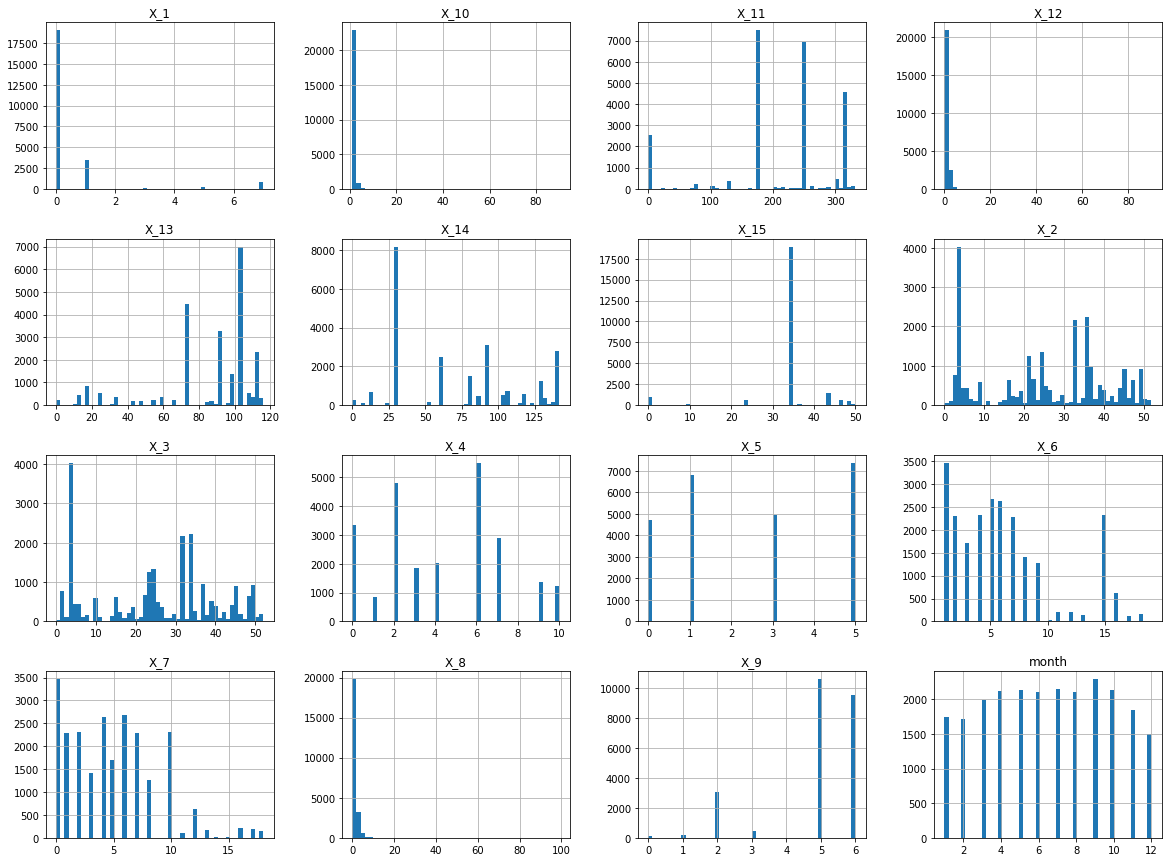

In [94]:
num_data.hist(bins=50,figsize=(20,15))
plt.show()

#### As you can see from description result and histograms that data colums have different range and does not follow normal distribution.
#### We need to standardize the data but before that we need to handle missing values.

#### As you can see from the graph of X_12 , data is skewed so we will impute missing values with median.

In [95]:
median_X12=train_data['X_12'].median()

In [96]:
train_data['X_12']=train_data['X_12'].fillna(median_X12)
test_data['X_12']=test_data['X_12'].fillna(median_X12)

In [97]:
train_data.isnull().sum()

INCIDENT_ID         0
X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
day                 0
month               0
year                0
dtype: int64

In [98]:
test_data.isnull().sum()

INCIDENT_ID    0
X_1            0
X_2            0
X_3            0
X_4            0
X_5            0
X_6            0
X_7            0
X_8            0
X_9            0
X_10           0
X_11           0
X_12           0
X_13           0
X_14           0
X_15           0
day            0
month          0
year           0
dtype: int64

#### Now there are no missing values in train and test data, we will apply standardization

In [99]:
X=train_data.drop(['MULTIPLE_OFFENSE','INCIDENT_ID'],axis=1)

In [100]:
X.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,day,month,year
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,04,7,04
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,18,7,17
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,15,3,17
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,13,2,09
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,13,4,05


In [101]:
scaler=StandardScaler()

In [102]:
scaled_data=scaler.fit_transform(X)

In [103]:
scaled_test_data=test_data.drop(['INCIDENT_ID'],axis=1)

In [104]:
scaled_test_data=scaler.transform(scaled_test_data)

In [105]:
train_df=pd.DataFrame(scaled_data,columns=X.columns)
test_final=pd.DataFrame(scaled_test_data,columns=X.columns)

#### Split the train_df ino train and test data so that we can calculate metrics on test data

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
train_df,test_df,train_labels,test_labels=train_test_split(train_df,train_data['MULTIPLE_OFFENSE'],test_size=0.2)

#### Apply Logitsic Regression Model

In [108]:
lr=LogisticRegression()

In [109]:
lr.fit(train_df,train_labels)

/usr/local/lib64/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
predictions_test=lr.predict(test_df)

In [111]:
predictions=lr.predict(test_final)

#### Calculate Precision , Recall and Accuracy

In [112]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [113]:
accuracy_score(test_labels,predictions_test)

0.9545264040234702

In [114]:
precision_score(test_labels,predictions_test)

0.9572451558550968

In [115]:
recall_score(test_labels,predictions_test)

0.9969291511296337

#### Print Confusion Matrix

In [116]:
from sklearn.metrics import confusion_matrix

In [117]:
confusion_matrix(test_labels,predictions_test)

array([[  10,  203],
       [  14, 4545]])

#### Save test predictions to submission file

In [118]:
submission=pd.DataFrame({'INCIDENT_ID':test_data.INCIDENT_ID,"MULTIPLE_OFFENSE":predictions})

In [119]:
submission.to_csv("submission_one.csv",index=False)

#### Apply gradient boosting

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

In [121]:
gb=GradientBoostingClassifier()

In [122]:
gb.fit(train_df,train_labels)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [123]:
predictions_test=lr.predict(test_df)

In [124]:
accuracy_score(test_labels,predictions_test)

0.9545264040234702

In [439]:
precision_score(train_data['MULTIPLE_OFFENSE'],predictions_train)

0.9592716211077781

In [440]:
recall_score(train_data['MULTIPLE_OFFENSE'],predictions_train)

0.9963577321397227

In [441]:
confusion_matrix(train_data['MULTIPLE_OFFENSE'],predictions_train)

array([[  104,   964],
       [   83, 22705]])

In [442]:
preds=gb.predict(test_df)

In [443]:
submission=pd.DataFrame({'INCIDENT_ID':test_data.INCIDENT_ID,"MULTIPLE_OFFENSE":preds})

In [444]:
submission.to_csv("submission_second.csv",index=False)